# PCA - principal component analysis

PCA används för dimensions-reducering
men framförallt försöker den hitta principala komponenter, försöker göra våra variabler/parametrar obereoende från varandra.

de kolumner som är linjärt oberoende är också statistiskt oberoende, med en korrelationsfaktor på 0

alla andra vektorer som finns kvar och inte är maximalt oberoende, och är en linjärkombination av andra vektorer



ena sidan vill vi ha en liten modell som genereliserar så bra som möjligt, en enkel modell är en bra modell.


In [28]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

raw_data = load_breast_cancer()

X = raw_data.data
y = raw_data.target

df = pd.DataFrame(X, columns=raw_data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


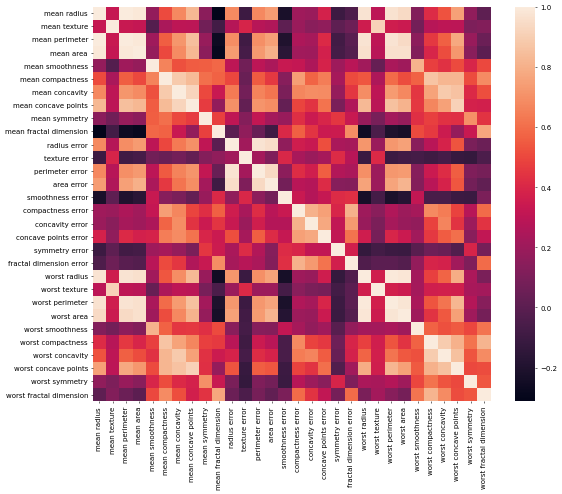

In [40]:
plt.figure(figsize=(12, 10), dpi=50)
sns.heatmap(df.corr())
plt.tight_layout()

pca is an unsupervised learning technique for reducing dimensionality of the data to a lower dimensional representation, but the main thing is finding variables undependent on eachother. for example a dataset with computer spcs, the hardware specs are more important than the color of the computer when it comes to predicting its price

mathematically we do this by finding a linear combination of feature variables with macimal variacnce and mutually oncorrelated for feature variables  $X_1,,,,X_p$ we get first principal compnent Z_1 

where the loading vector or component vectore O1 is normalized, the objecitve is hence to find the princiipal component vectores, thses vectors are eigenvectors of the covariance matric of the feature matrix, the variance explained is represented by the eigenvalues, we want to find principal components that explain most of the variance of the original dataset in order not to lose to much information when reducing dimensions

when we have computed the eigenvectors we sort them bu eigenvalues and pick a number d dimensions to project our data onto,

the number d can be obtaioned thoug a knee plot of the porportional variance explained

by recuing the number of dimension we also decrease the amount of data that the model needs to process, and can speed up computations

very importnat tis that the data is scaled with feature standardization, ie 0 mean and unit variance

[Text(0.5, 1.0, 'proportion variance explained (PVE) by principal component'),
 Text(0.5, 0, 'number of components'),
 Text(0, 0.5, 'PVE')]

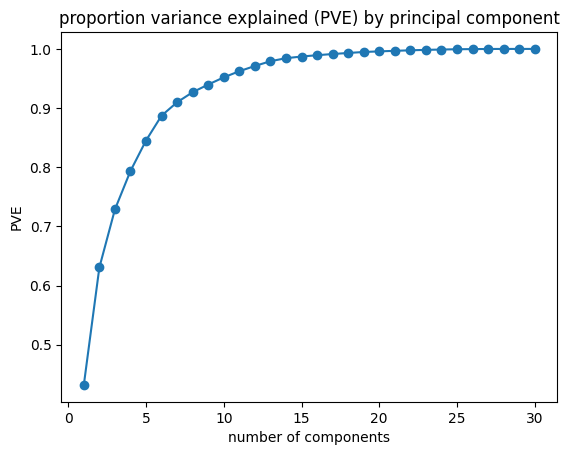

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=X.shape[1])
pca_transformation = pca.fit_transform(scaled_X_train)

proportion_variance_explained = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1,len(proportion_variance_explained)+1), proportion_variance_explained,"o-")
ax.set(title="proportion variance explained (PVE) by principal component", xlabel="number of components", ylabel="PVE")


[Text(0.5, 1.0, 'Data transformed into principal components'),
 Text(0.5, 0, 'PC1'),
 Text(0, 0.5, 'pc2')]

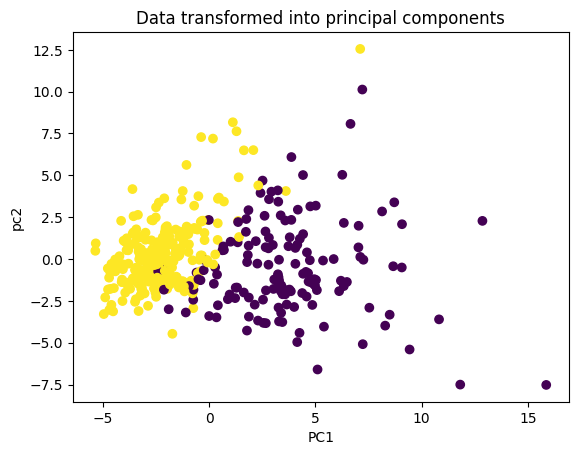

In [31]:
fig, ax = plt.figure(), plt.axes()
ax.scatter(pca_transformation[:,0], pca_transformation[:,1], c=y_train,cmap="viridis")
ax.set(title="Data transformed into principal components", xlabel="PC1",ylabel="pc2")

In [32]:
pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]

(np.float64(0.4320343615949976), np.float64(0.19853475045822347))

pca can be used in  pipline where data is first scaled followed by oca and afterwards a classifier or regressior for regression problem

some features are correlated and explains very little of the variance, and hence can be represented by lower dimensional principal components


In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix

def eval_model(model,title=""):
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    print(classification_report(y_test,y_pred))
    cm= confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



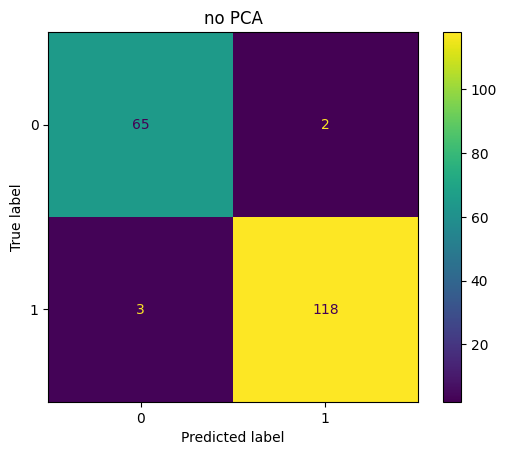

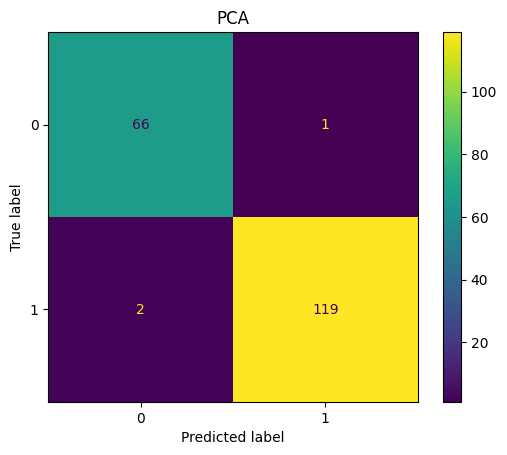

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe_with_pca = Pipeline([
    ("scaling", StandardScaler()),
    ("pca", PCA(10)),
    ("svm", SVC(kernel="linear", max_iter=10000))
])

pipe_without_pca = Pipeline([
    ("scaling", StandardScaler()),
    ("svm", SVC(kernel="linear", max_iter=10000))
])


eval_model(pipe_without_pca,"no PCA")
eval_model(pipe_with_pca,"PCA")